In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/rev-975/clubs/refs/heads/main/quant/AI%20Financial%20Market%20Data.csv'
df = pd.read_csv(url, encoding='utf-8')

# clean dataset

df.drop_duplicates(inplace=True) # removes any duplicate rows
#df.dropna(inplace=True) # removes rows with missing values

#print(df.head(5))
#print()
print(df.info())
print()

# check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB
None

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64


In [ ]:
# basics

# stat analysis

avg_rnd = df.groupby("Company")["R&D_Spending_USD_Mn"].mean()
avg_rev = df.groupby("Company")["AI_Revenue_USD_Mn"].mean()
avg_stock_impact = df.groupby("Company")["Stock_Impact_%"].mean()

# print averages

print(f"Average RnD Spending: \n{avg_rnd.round(2)}\n")
print(f"Average AI Revenue: \n{avg_rev.round(2)}\n")
print(f"Average Stock Impact: \n{avg_stock_impact.round(2)}\n")

Average RnD Spending: 
Company
Google    115.89
Meta       72.42
OpenAI      7.25
Name: R&D_Spending_USD_Mn, dtype: float64

Average AI Revenue: 
Company
Google    77.88
Meta      51.91
OpenAI     2.59
Name: AI_Revenue_USD_Mn, dtype: float64

Average Stock Impact: 
Company
Google    0.03
Meta      0.01
OpenAI    0.04
Name: Stock_Impact_%, dtype: float64



In [ ]:
# highest total RnD spending

top_rnd = df.groupby('Company')["R&D_Spending_USD_Mn"].sum()
print(f"Company with highest RnD Spending: {top_rnd.idxmax()} (${top_rnd.max()})")

# highest growth
ai_growth = df.groupby("Company")["AI_Revenue_Growth_%"].mean()
print(f"The company with the fastest average AI Revenue growth is {ai_growth.idxmax()} ({round(ai_growth.max(),2)}%).\n")

Company with highest RnD Spending: Google ($423341.14)
The company with the fastest average AI Revenue growth is Google (159.6%).



In [ ]:
# corr
print("Correlation matrix: ")
corr = df[['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']].corr()
print(corr)
print()

print(f"RD Spending vs AI Revenue: {corr.loc['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']:.3f}")
print(f"AI Revenue vs Stock Impact: {corr.loc['AI_Revenue_USD_Mn', 'Stock_Impact_%']:.3f}")
print(f"RnD Spending vs Stock Impact: {corr.loc['R&D_Spending_USD_Mn', 'Stock_Impact_%']:.3f}")

Correlation matrix: 
                     R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
R&D_Spending_USD_Mn             1.000000           0.935030   
AI_Revenue_USD_Mn               0.935030           1.000000   
AI_Revenue_Growth_%             0.291245           0.530128   
Stock_Impact_%                 -0.004628          -0.000017   

                     AI_Revenue_Growth_%  Stock_Impact_%  
R&D_Spending_USD_Mn             0.291245       -0.004628  
AI_Revenue_USD_Mn               0.530128       -0.000017  
AI_Revenue_Growth_%             1.000000        0.020937  
Stock_Impact_%                  0.020937        1.000000  

RD Spending vs AI Revenue: 0.935
AI Revenue vs Stock Impact: -0.000
RnD Spending vs Stock Impact: -0.005


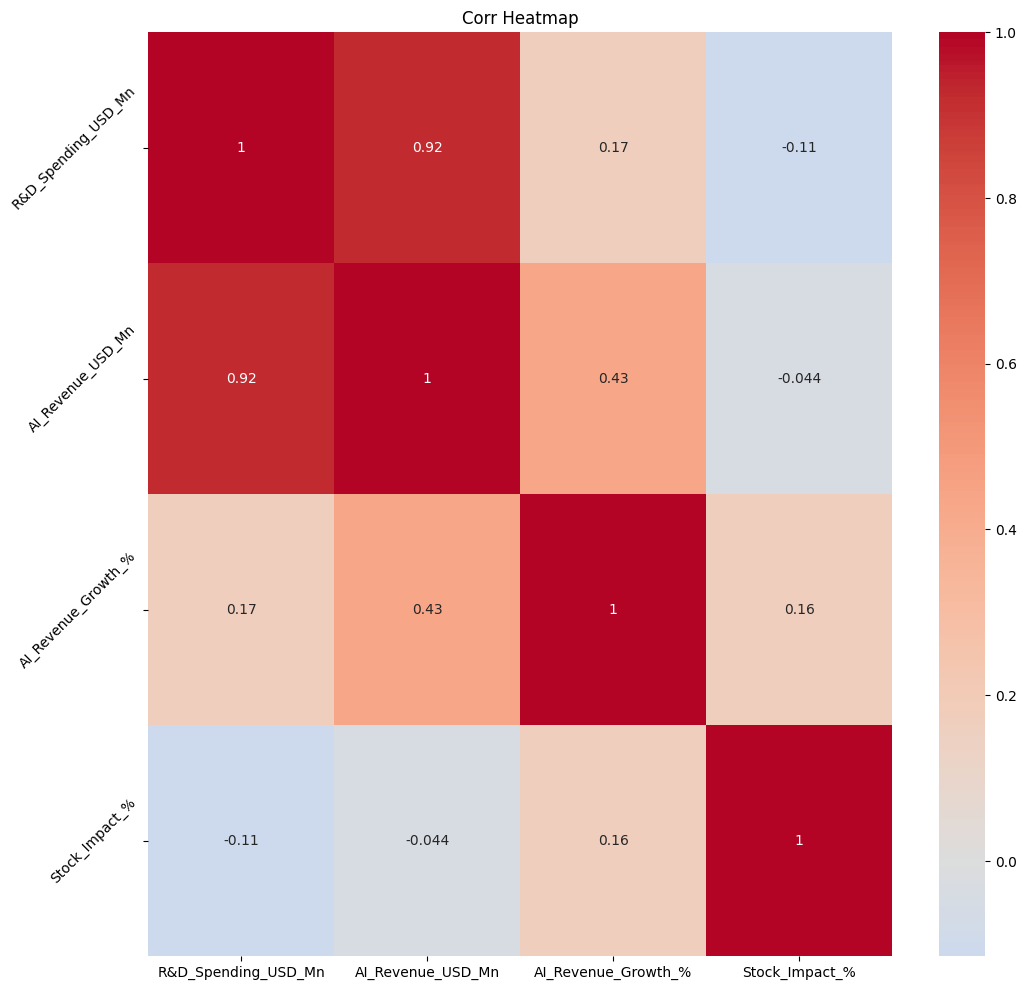

In [ ]:
# 1. heatmap
plt.figure(figsize=(12, 12))
corr = df[['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Corr Heatmap')
plt.yticks(rotation=45)
plt.show()


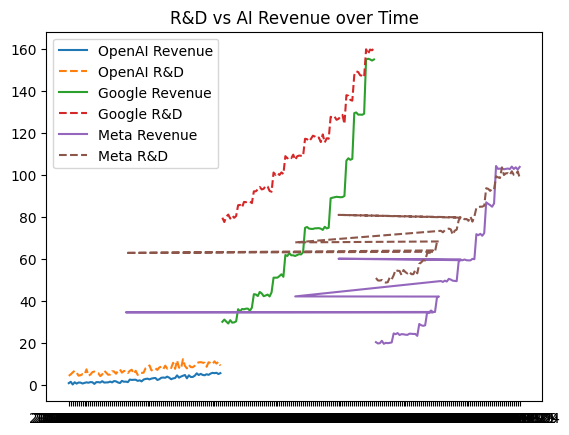

In [ ]:
# 2.1a rnd vs ai revenue for each companny over time
for company in df["Company"].unique():
    subset = df[df["Company"] == company]
    plt.plot(subset["Date"], subset["AI_Revenue_USD_Mn"], label=f"{company} Revenue")
    plt.plot(subset["Date"], subset["R&D_Spending_USD_Mn"], linestyle="--", label=f"{company} R&D")
plt.legend()
plt.title("R&D vs AI Revenue over Time")
plt.show()


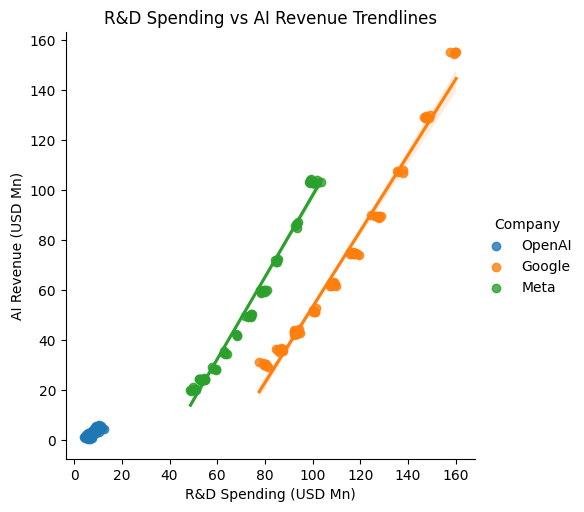

In [ ]:
# 2.1b rnd spending vs ai revenue
sns.lmplot(x= 'R&D_Spending_USD_Mn', y = 'AI_Revenue_USD_Mn', hue='Company', data = df, fit_reg=True)
plt.title('R&D Spending vs AI Revenue Trendlines')
plt.xlabel('R&D Spending (USD Mn)')
plt.ylabel('AI Revenue (USD Mn)')
plt.show()

Top 3 companies by ROI: 
Company
Meta      0.672588
Google    0.630536
OpenAI    0.342589
Name: ROI, dtype: float64


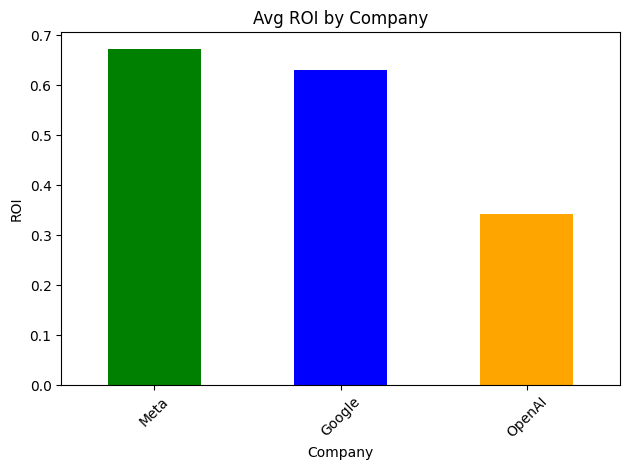

In [ ]:
# 2.2 top 3 companies with most roi(rev/rnd_spending)
df['ROI'] = df['AI_Revenue_USD_Mn']/df['R&D_Spending_USD_Mn']
avg_roi_by_company = df.groupby('Company')['ROI'].mean().sort_values(ascending=False)
print(f'Top 3 companies by ROI: \n{avg_roi_by_company.head(3)}')


avg_roi_by_company.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Avg ROI by Company')
plt.xlabel('Company')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

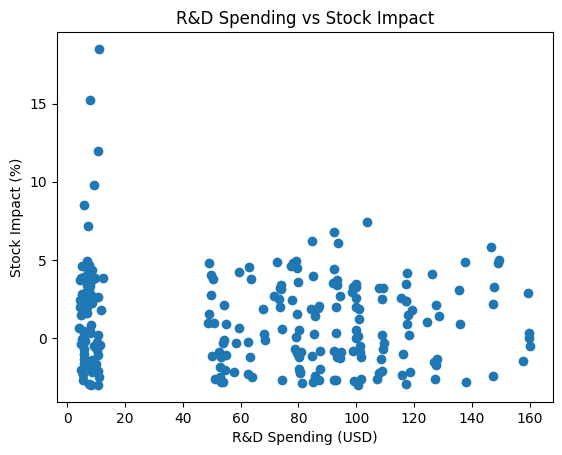

In [ ]:
# 3. relation between rnd and stock impact
plt.scatter(df['R&D_Spending_USD_Mn'], df['Stock_Impact_%'])
plt.xlabel('R&D Spending (USD)')
plt.ylabel('Stock Impact (%)')
plt.title('R&D Spending vs Stock Impact')
plt.show()

In [ ]:
# 4.1 top 2 events where max stock impact seen
top_positive = df.nlargest(2, "Stock_Impact_%")[["Date", "Company", "Event", "Stock_Impact_%"]]
top_negative = df.nsmallest(2, "Stock_Impact_%")[["Date", "Company", "Event", "Stock_Impact_%"]]
print("\nTop 2 Positive Stock Impact Events:\n", top_positive)
print("\nTop 2 Negative Stock Impact Events:\n", top_negative)

# 4.2 company that reacts strongest
strongest_company = df["Stock_Impact_%"].abs().groupby(df["Company"]).mean()
print(f"\nStrongest reacting company: {strongest_company.idxmax()} ({round(strongest_company.max(),2)}%)")



Top 2 Positive Stock Impact Events:
             Date Company                      Event  Stock_Impact_%
3408  2024-05-01  OpenAI  GPT-5 release (predicted)            18.5
2994  2023-03-14  OpenAI              GPT-4 release            15.2

Top 2 Negative Stock Impact Events:
              Date Company                        Event  Stock_Impact_%
3350   2024-03-04  OpenAI  AI Ads Optimization upgrade           -3.00
10785  2024-07-11    Meta      AI ethics policy update           -2.99

Strongest reacting company: OpenAI (2.98%)


#Takeaway and Analysis
Correlation analysis confirms a strong link between RnD and revenue (0.94) but almost none with stock impact (~0). Google demonstrates the most aggressive RnD strategy, averaging 115.89M USD in spending and generating the highest AI revenue at 77.88M USD. Meta follows with 72.42M USD in RnD and 51.91M USD in revenue, but achieves the strongest efficiency with an ROI of 0.67 compared to Google’s 0.63 and OpenAI’s 0.34. OpenAI invests the least (7.25M USD) with revenue of 2.59M USD, yet shows the fastest growth. OpenAI has the strongest reactions to events (avg impact 2.98%). The visualisations show that RnD drives AI revenue and there seems to be no link between RnD revenue and stock impact as evident from the scatter plot and the r value of -0.005.
